<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

# Desafío - Expansiones Basales

Luis Porras

## Nota: Se está utilizando una version de pygam 0.8.0

## Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.


* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.


* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo


* Importe los módulos clásicos del trabajo en ciencia de datos.


* El archivo tiene el nombre `compresive_strength_concrete.csv`. Impórtelo y genere estadísticas descriptivas.


* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería `pyGAM`.

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

# Configuración de gráficas
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["figure.dpi"] = 80
sns.set_style('darkgrid')

# Liberías de Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Todas las columnas contienen información. Además casi todas las columnas son decimales, exceptuando `Age (day)`

### Ejercicio 2: Descripción

* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .


* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .


* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [5]:
# Renombrando las columans

df.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


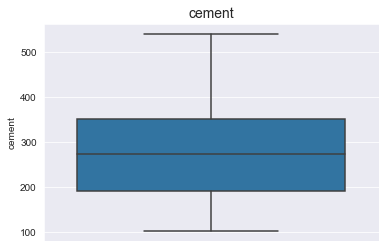

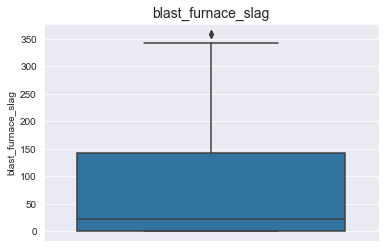

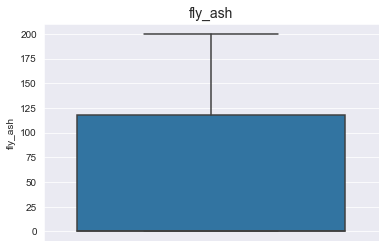

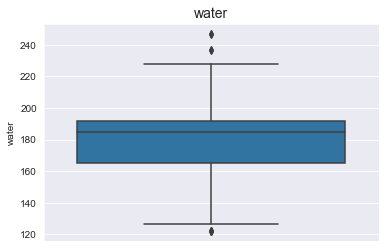

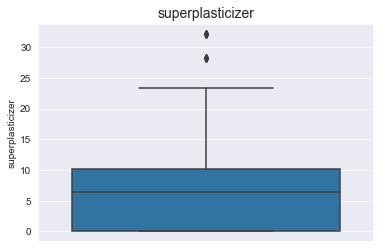

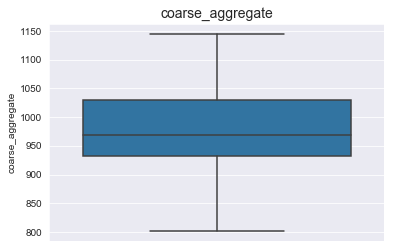

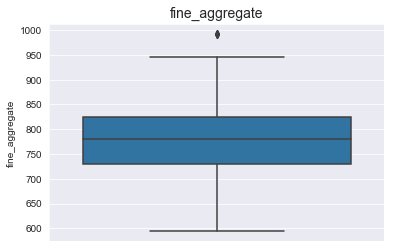

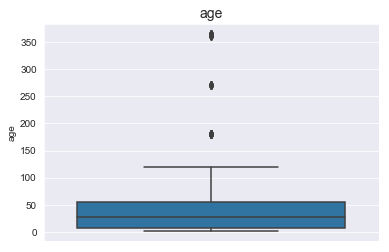

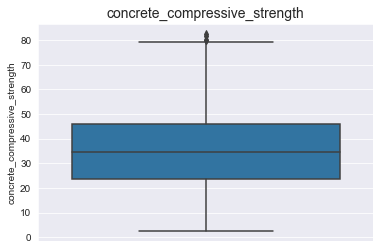

In [6]:
for col_name, col in df.iteritems():
    sns.boxplot(col, orient='v').set_title(col_name, size=14)
    plt.show()

Las variables no contienen muchos valores outliers

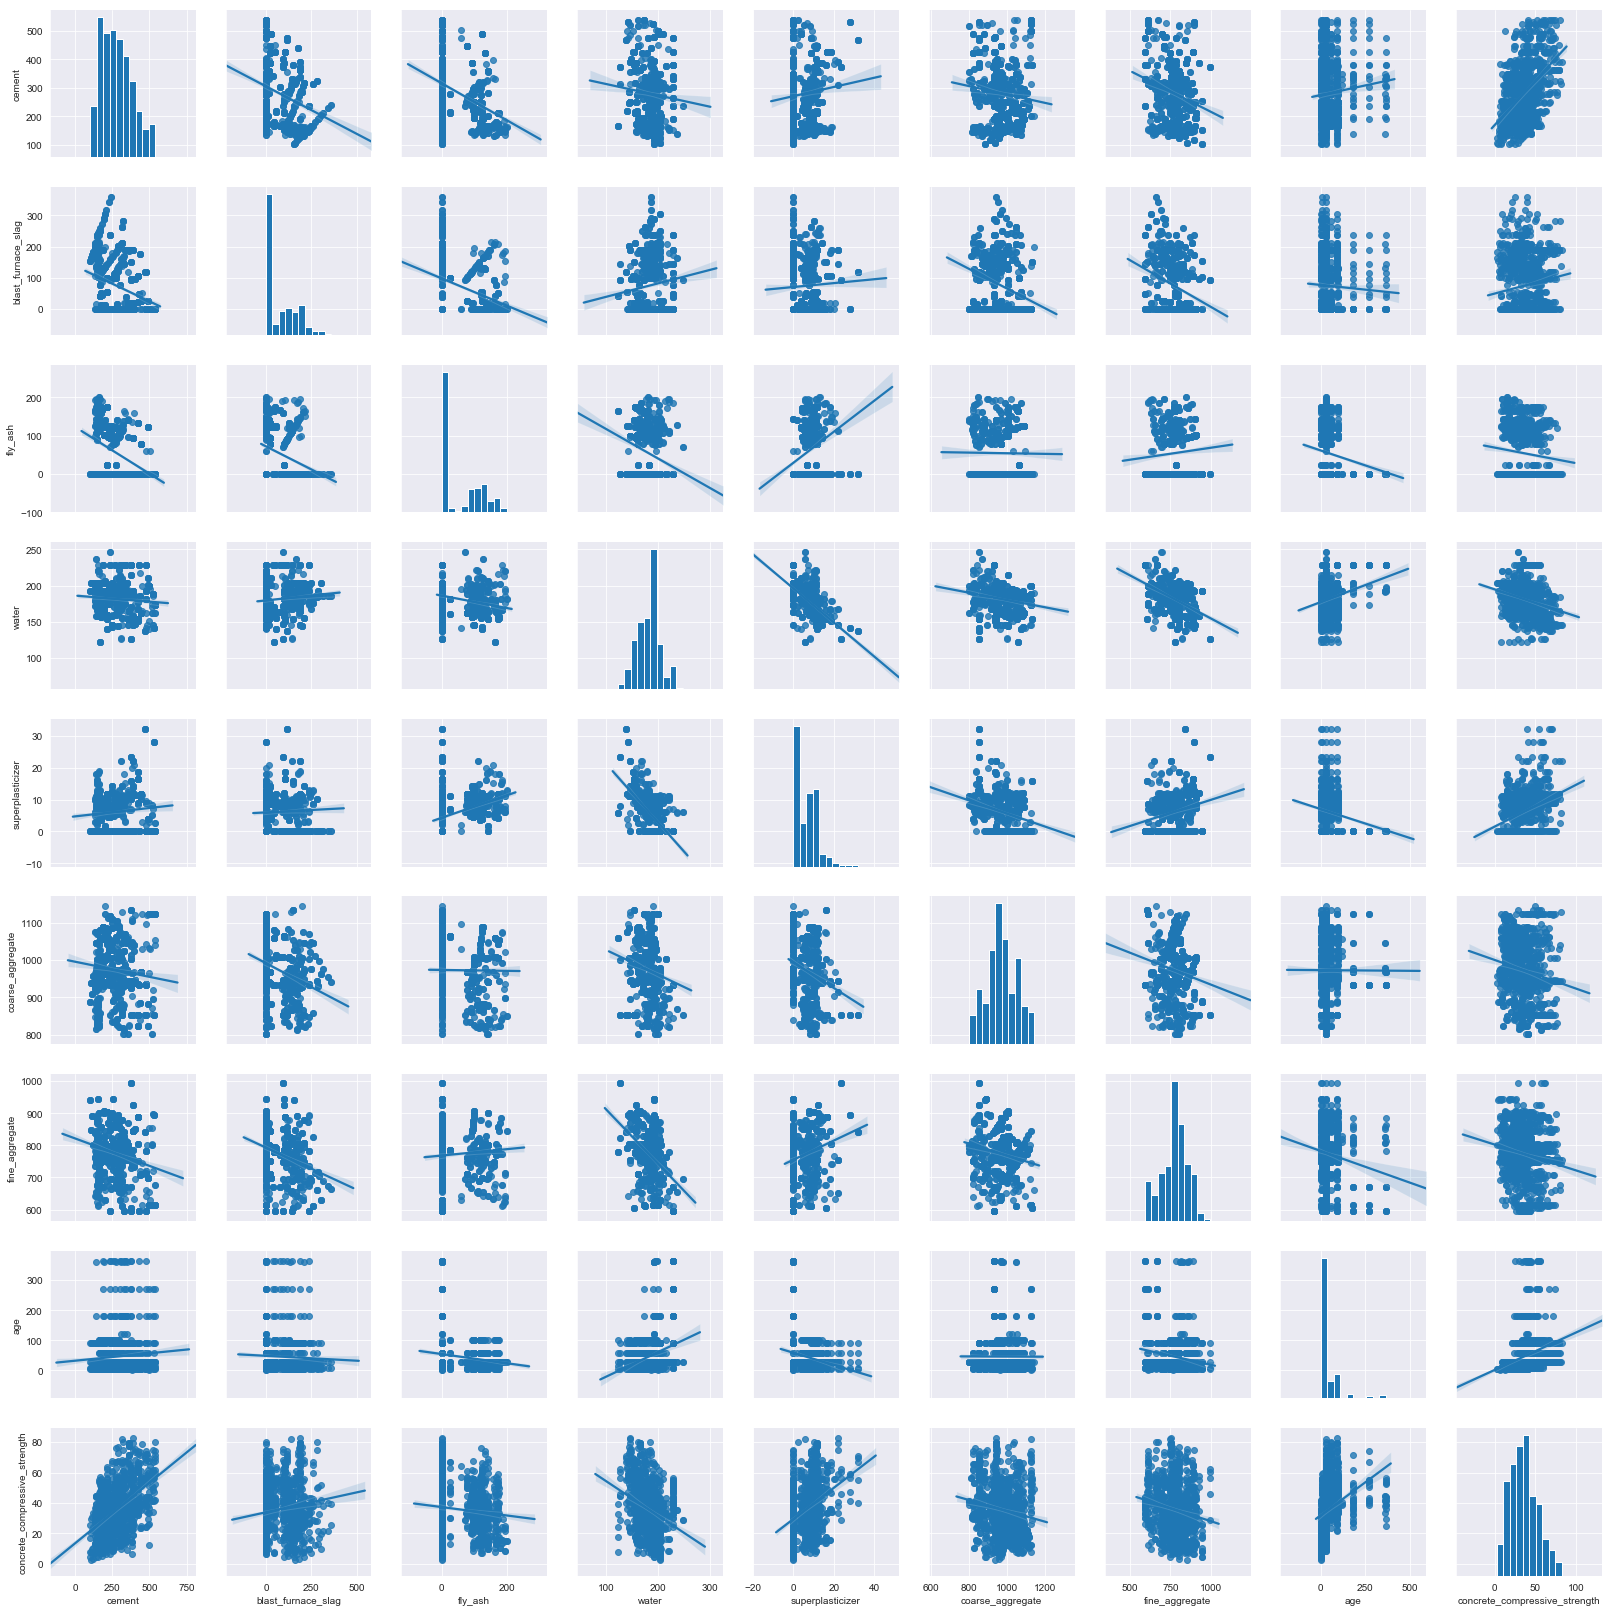

In [7]:
sns.pairplot(df, kind='reg')

Nuestra vector Objetivo `concrete_compressive_strength` tiene correlacion con todas las variables. 

In [8]:
# Estadisticas descriptivas
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


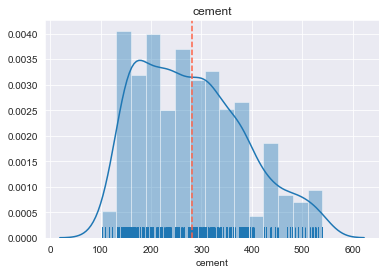

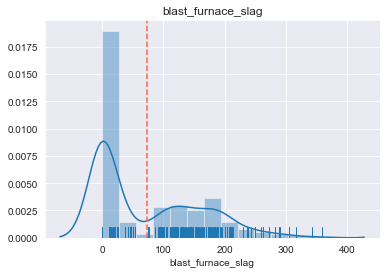

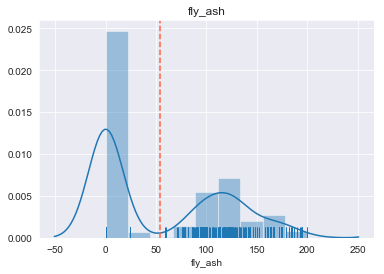

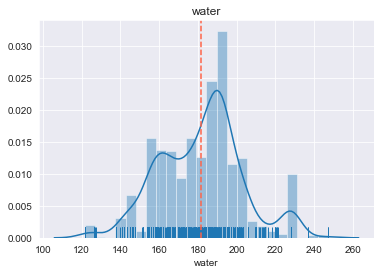

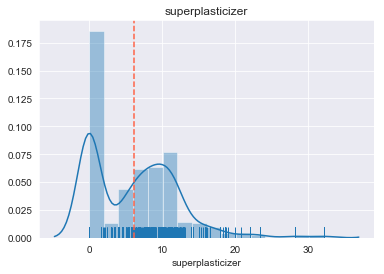

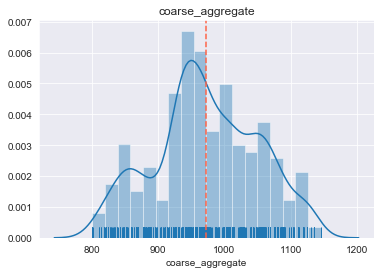

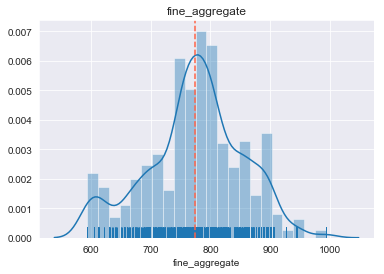

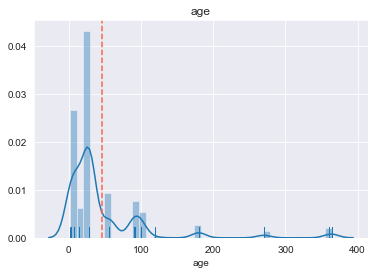

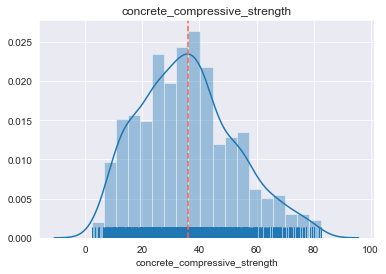

In [9]:
for col_name, col in df.iteritems():
    sns.distplot(col, rug=True)
    plt.title(col_name)
    plt.axvline(col.mean(), color='tomato', linestyle='--', label='mean')
    plt.show()

Nuestro vector objetivo `concrete_compressive_strength` tiene una destribución parecida a la normal y unimodal

In [10]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto, importe las métricas de desempeño asociadas.


* Genere conjuntos de entrenamiento y validación.


* Genere un primer modelo sin implementar la función gridsearch. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.


* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from pygam import LinearGAM

In [12]:
X = df_scaled.iloc[:, :-1]
y = df_scaled['concrete_compressive_strength']

N = X.shape[0]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 240008947)

In [13]:
model_linear_gam = LinearGAM().fit(X_train, y_train)

In [14]:
def summary(model):
    print('Lam: {}'.format(model.lam))
    y_hat = model.predict(X_test)
    print('MSE: {}'.format(mean_squared_error(y_test, y_hat)))
    print('MAE: {}'.format(median_absolute_error(y_test, y_hat)))
    print('R2: {}'.format(r2_score(y_test, y_hat)))

In [15]:
summary(model_linear_gam)

Lam: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]
MSE: 0.10871241606616827
MAE: 0.23739990708800907
R2: 0.8974649188706337


In [16]:
model_linear_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      79.717
Link Function:                     IdentityLink Log Likelihood:                                 -2225.3787
Number of Samples:                          690 AIC:                                             4612.1915
                                                AICc:                                            4633.8786
                                                GCV:                                                0.1194
                                                Scale:                                              0.0949
                                                Pseudo R-Squared:                                   0.9135
Feature Function                  Lam

In [17]:
search_params = {'lam': np.logspace(-3, 3, 11)}

In [18]:
model_gam_gridsearch = LinearGAM(n_splines=10).gridsearch(X_train.values, y_train.values, **search_params)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [19]:
summary(model_gam_gridsearch)

Lam: [[0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134]]
MSE: 0.11878051377293142
MAE: 0.23353017030703666
R2: 0.8879689178383965


In [20]:
model_gam_gridsearch.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     59.8553
Link Function:                     IdentityLink Log Likelihood:                                 -2090.2269
Number of Samples:                          690 AIC:                                             4302.1644
                                                AICc:                                            4314.1497
                                                GCV:                                                0.1237
                                                Scale:                                              0.1045
                                                Pseudo R-Squared:                                   0.9016
Feature Function                  Lam

ambos modelos presentan metricas similares, sin embargo el primero modelo presta menor MSE

## Ejercicio 4: Dependencia Parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.


* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.


* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [73]:
def parcial_dependency(model):

    plt.rcParams["figure.figsize"] = (20, 15)
    plt.rcParams["figure.dpi"] = 80

    attribute = X_train.columns
    
    cols = 4;
    rows = np.ceil(len(attribute) / cols)

    for i, n in enumerate(range(len(attribute))):
        x_grid = model.generate_X_grid(i)

        plt.subplot(rows, cols, i + 1)

        # extraemos la dependencia parcial y sus intervalos de confianza al 95%
        partial_dep, confidence_intervals = model.partial_dependence(1, x_grid, width=0.95)
        
        # Visualizamos la recta
        plt.plot(x_grid[:, n], partial_dep, color='tomato')
        
        # agregamos el nombre del atributo
        plt.title(attribute[n])
        plt.plot(X_train[attribute[n]], [plt.ylim()[0]] * len(X_train[attribute[n]]), '|', color='orange', alpha=.5)
        plt.tight_layout()

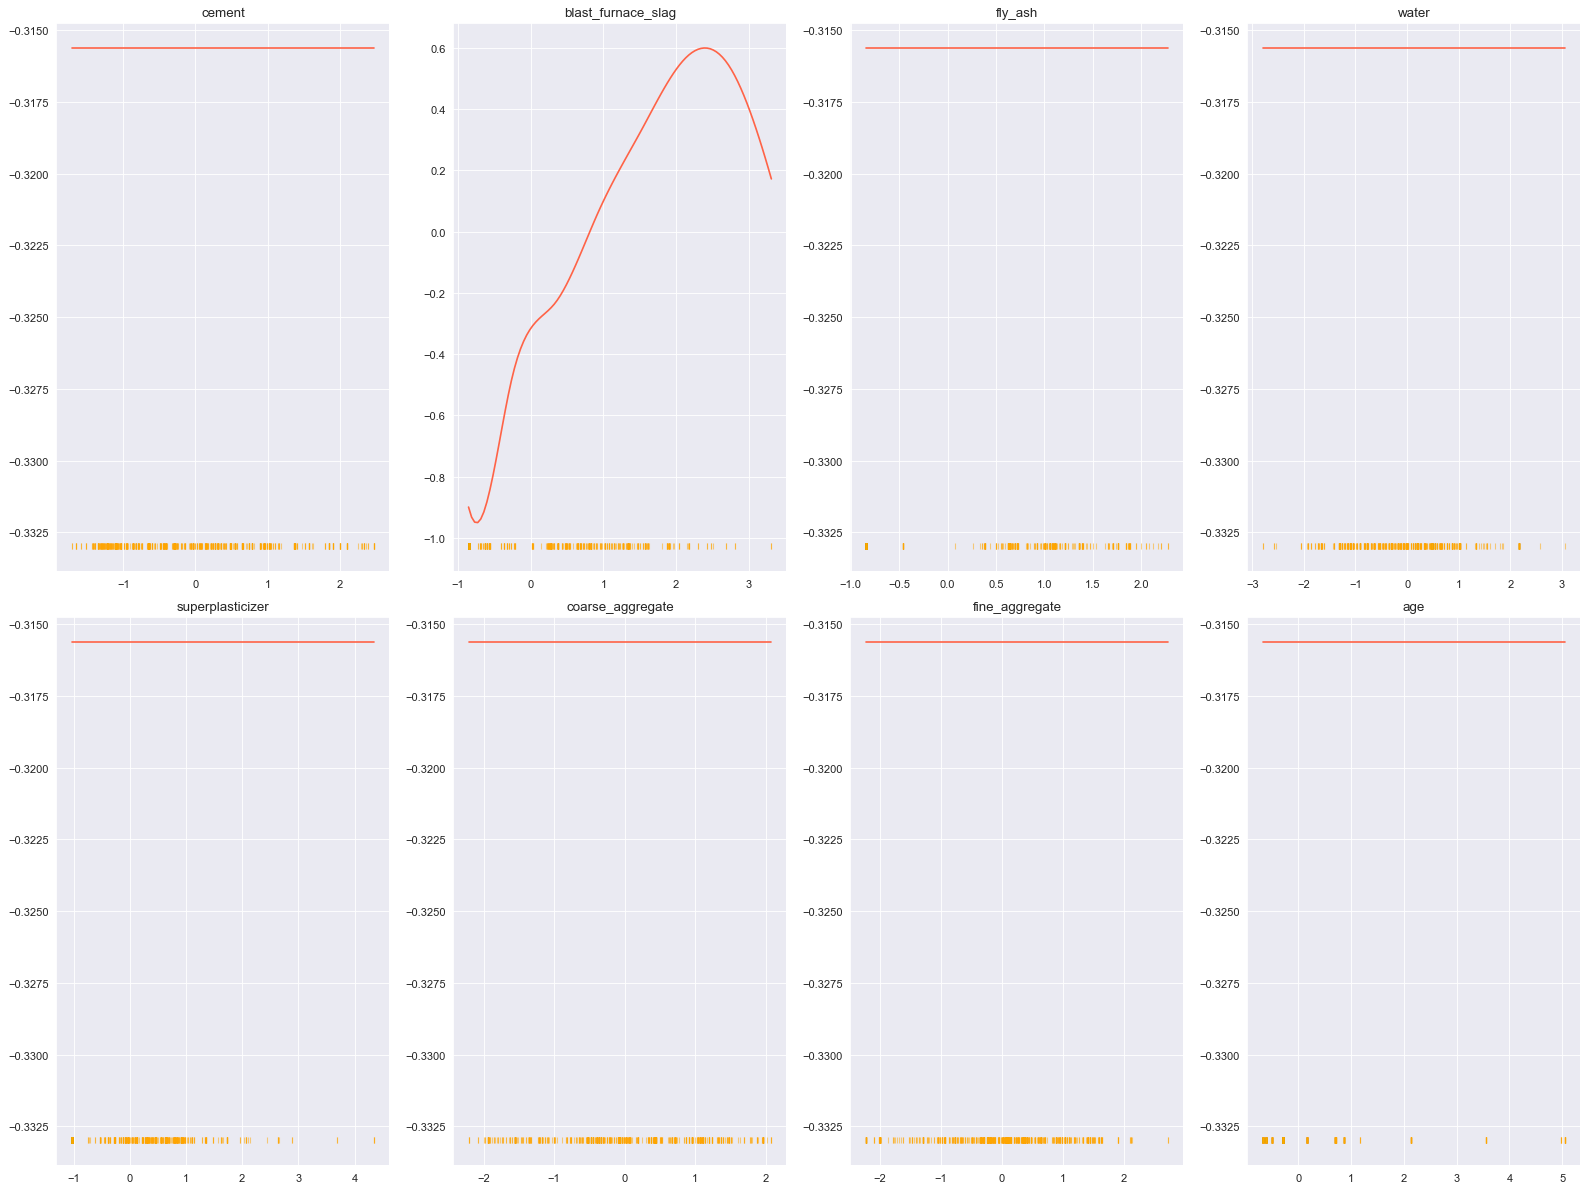

In [74]:
parcial_dependency(model_gam_gridsearch)